Study here :  https://www.superdatascience.com/the-ultimate-guide-to-recurrent-neural-networks-rnn/

We will see: 
- the idea behind RNN
- The Vanishing Gradient Problem 
- Long Short-Term Memory (LSTM)
- Pratical intuition

The main feature neis to imitate human brain.

Let's take a look to our dataset "Google stock price"


# Recurrent Neural Network
# Part 1 - Data Preprocessing

In [2]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
dataset_train

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"
...,...,...,...,...,...,...
1253,12/23/2016,790.90,792.74,787.28,789.91,"623,400"
1254,12/27/2016,790.68,797.86,787.66,791.55,"789,100"
1255,12/28/2016,793.70,794.23,783.20,785.05,"1,153,800"
1256,12/29/2016,783.33,785.93,778.92,782.79,"744,300"


In [5]:
training_set = dataset_train.iloc[:, 1:2].values

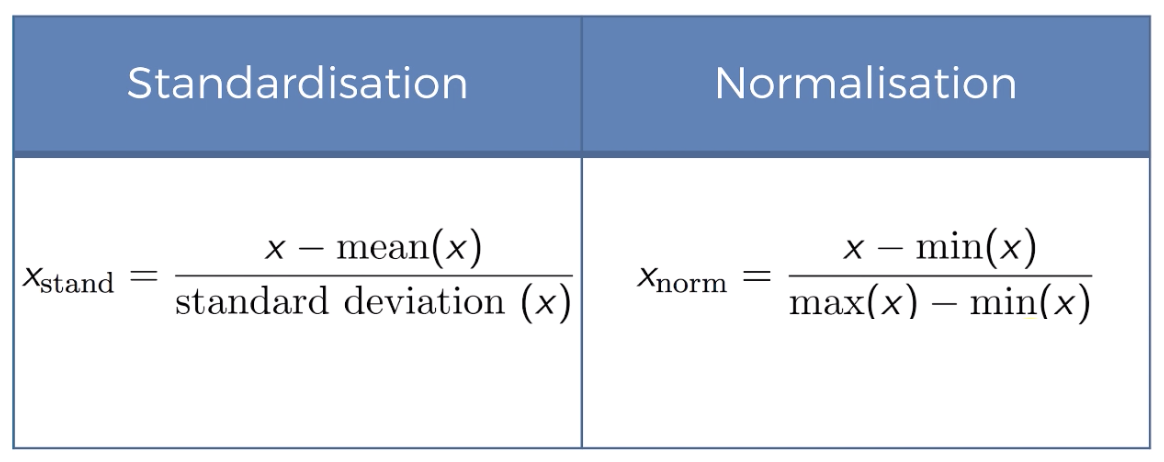

In [22]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
pd.DataFrame(training_set_scaled)

,0
0,0.085814
1,0.097012
2,0.094334
3,0.091562
4,0.079842
...,...
1253,0.952043
1254,0.951633
1255,0.957251
1256,0.937960


In [11]:
training_set_scaled.shape # 1258

(1258, 1)

In [12]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1258):
    X_train.append(training_set_scaled[i-60:i, 0]) #every 60 stock prices - 0-59 because the upperbound is escluded
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [26]:
X_train.shape

pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
0,0.085814,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,...,0.052143,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977
1,0.097012,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,...,0.056124,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279
2,0.094334,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,...,0.058189,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716
3,0.091562,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,...,0.065407,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541
4,0.079842,0.064328,0.058542,0.065686,0.061091,0.066393,0.061426,0.074745,0.027978,0.023793,...,0.068830,0.072438,0.079935,0.078466,0.080345,0.084977,0.086279,0.084716,0.074541,0.078838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1193,0.934445,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,...,0.931766,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759
1194,0.924939,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,...,0.941141,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043
1195,0.921069,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,...,0.957623,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633
1196,0.924381,0.930482,0.929905,0.931133,0.927506,0.944155,0.938760,0.934035,0.934835,0.931394,...,0.964134,0.964023,0.969715,0.950778,0.962944,0.961232,0.954759,0.952043,0.951633,0.957251


In [20]:
pd.DataFrame(y_train)

,0
0,0.086279
1,0.084716
2,0.074541
3,0.078838
4,0.072383
...,...
1193,0.952043
1194,0.951633
1195,0.957251
1196,0.937960


In [29]:
# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train

array([[[0.08581368],
        [0.09701243],
        [0.09433366],
        ...,
        [0.07846566],
        [0.08034452],
        [0.08497656]],

       [[0.09701243],
        [0.09433366],
        [0.09156187],
        ...,
        [0.08034452],
        [0.08497656],
        [0.08627874]],

       [[0.09433366],
        [0.09156187],
        [0.07984225],
        ...,
        [0.08497656],
        [0.08627874],
        [0.08471612]],

       ...,

       [[0.92106928],
        [0.92438053],
        [0.93048218],
        ...,
        [0.95475854],
        [0.95204256],
        [0.95163331]],

       [[0.92438053],
        [0.93048218],
        [0.9299055 ],
        ...,
        [0.95204256],
        [0.95163331],
        [0.95725128]],

       [[0.93048218],
        [0.9299055 ],
        [0.93113327],
        ...,
        [0.95163331],
        [0.95725128],
        [0.93796041]]])

# Part 2 - Building the RNN

In [31]:
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [32]:
# Initialising the RNN
regressor = Sequential()

LSTM(
- units = numer of LSTM cells. 50 will get a model with high dimensionality
- return_sequences = True - because we are gonna add another LSTM layer 
- input_shape = (X_train.shape[1], 1))   # timestamps and indicator
) 

In [33]:
# we add Droput regularization in order to avoid the overfit 
# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))  ### WE DON'T NEED TO SPECIFY THE INPUT LAYER ANYMORE
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1)) # 1 is the output we want to predict

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error') 

# RMSprop usually is the recommanded choise as optimizer for RNN

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)

Epoch 1/100
1198/1198 [==============================] - 4s 4ms/step - loss: 0.0406
Epoch 2/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0060
Epoch 3/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0051
Epoch 4/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0063
Epoch 5/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0049
Epoch 6/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0044
Epoch 7/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0043
Epoch 8/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0045
Epoch 9/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0045
Epoch 10/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 11/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0042
Epoch 12/100
1198/1198 [==============================] - 3s 2ms/step - lo

1198/1198 [==============================] - 3s 2ms/step - loss: 0.0017
Epoch 98/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 99/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0015
Epoch 100/100
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0015


In [34]:
# Making the prediction and visualize the results 

In [35]:
# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_prive = dataset_test.iloc[:, 1:2].values

In [ ]:
# Getting the predicting stock price of 2017 